<a href="https://colab.research.google.com/github/Ivan1steer/ML_lab/blob/main/ML_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков
from sklearn.preprocessing import LabelEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Student Depression Dataset.csv')

In [ ]:
train.head()

id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3          7-8 hours       Moderate      BCA   
4          5-6 hours       Moderate   M.Tech   

  Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                   Yes               3.0               1.0   
1                                    No               3.0               2.0   
2                                    No               9.0               1.0   
3                                   Yes               4.0               5.0   
4                                   Yes               1.0               1.0   

  Family History of Mental Illness  Depression  
0                               No           1  
1                              Yes           0  
2                              Yes           0  
3                              Yes           1  
4                               No           0

In [ ]:
train.describe()

id           Age  Academic Pressure  Work Pressure  \
count   27901.000000  27901.000000       27901.000000   27901.000000   
mean    70442.149421     25.822300           3.141214       0.000430   
std     40641.175216      4.905687           1.381465       0.043992   
min         2.000000     18.000000           0.000000       0.000000   
25%     35039.000000     21.000000           2.000000       0.000000   
50%     70684.000000     25.000000           3.000000       0.000000   
75%    105818.000000     30.000000           4.000000       0.000000   
max    140699.000000     59.000000           5.000000       5.000000   

               CGPA  Study Satisfaction  Job Satisfaction  Work/Study Hours  \
count  27901.000000        27901.000000      27901.000000      27901.000000   
mean       7.656104            2.943837          0.000681          7.156984   
std        1.470707            1.361148          0.044394          3.707642   
min        0.000000            0.000000          0.000000          0.000000   
25%        6.290000            2.000000          0.000000          4.000000   
50%        7.770000            3.000000          0.000000          8.000000   
75%        8.920000            4.000000          0.000000         10.000000   
max       10.000000            5.000000          4.000000         12.000000   

       Financial Stress    Depression  
count      27898.000000  27901.000000  
mean           3.139867      0.585499  
std            1.437347      0.492645  
min            1.000000      0.000000  
25%            2.000000      0.000000  
50%            3.000000      1.000000  
75%            4.000000      1.000000  
max            5.000000      1.000000

In [ ]:
print("Названия столбцов:")
print(train.columns)
print("\nСтроки:")
train.head()

Названия столбцов:
Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

Строки:


id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc   
2  Less than 5 hours        Healthy       BA   
3          7-8 hours       Moderate      BCA   
4          5-6 hours       Moderate   M.Tech   

  Have you ever had suicidal thoughts ?  Work/Study Hours  Financial Stress  \
0                                   Yes               3.0               1.0   
1                                    No               3.0               2.0   
2                                    No               9.0               1.0   
3                                   Yes               4.0               5.0   
4                                   Yes               1.0               1.0   

  Family History of Mental Illness  Depression  
0                               No           1  
1                              Yes           0  
2                              Yes           0  
3                              Yes           1  
4                               No           0

In [ ]:
train.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [ ]:
train = train.dropna()
train.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

Заменим категориальные признаки на числовые

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
train[['Gender', 'City', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']] = enc.fit_transform(train[['Gender', 'City', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']])
train.head()

id  Gender   Age  City Profession  Academic Pressure  Work Pressure  CGPA  \
0   2     1.0  33.0  51.0    Student                5.0            0.0  8.97   
1   8     0.0  24.0   3.0    Student                2.0            0.0  5.90   
2  26     1.0  31.0  44.0    Student                3.0            0.0  7.03   
3  30     0.0  28.0  49.0    Student                3.0            0.0  5.59   
4  32     0.0  25.0  16.0    Student                4.0            0.0  8.13   

   Study Satisfaction  Job Satisfaction  Sleep Duration  Dietary Habits  \
0                 2.0               0.0             0.0             0.0   
1                 5.0               0.0             0.0             1.0   
2                 5.0               0.0             2.0             0.0   
3                 2.0               0.0             1.0             1.0   
4                 3.0               0.0             0.0             1.0   

   Degree  Have you ever had suicidal thoughts ?  Work/Study Hours  \
0     3.0                                    1.0               3.0   
1    10.0                                    0.0               3.0   
2     5.0                                    0.0               9.0   
3     7.0                                    1.0               4.0   
4    17.0                                    1.0               1.0   

   Financial Stress  Family History of Mental Illness  Depression  
0               1.0                               0.0           1  
1               2.0                               1.0           0  
2               1.0                               1.0           0  
3               5.0                               1.0           1  
4               1.0                               0.0           0

Проанализируем Бинарные признаки и признаки-оценки

<ipython-input-75-fc1125aa9b07>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[col], palette='Set2')


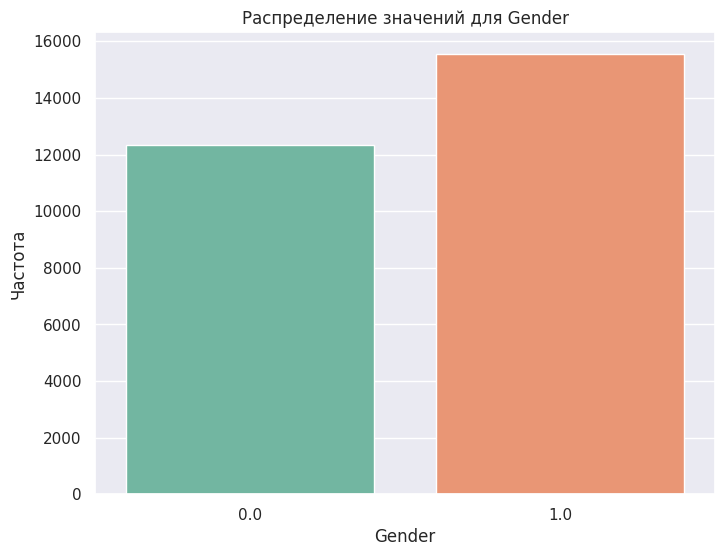

<ipython-input-75-fc1125aa9b07>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[col], palette='Set2')


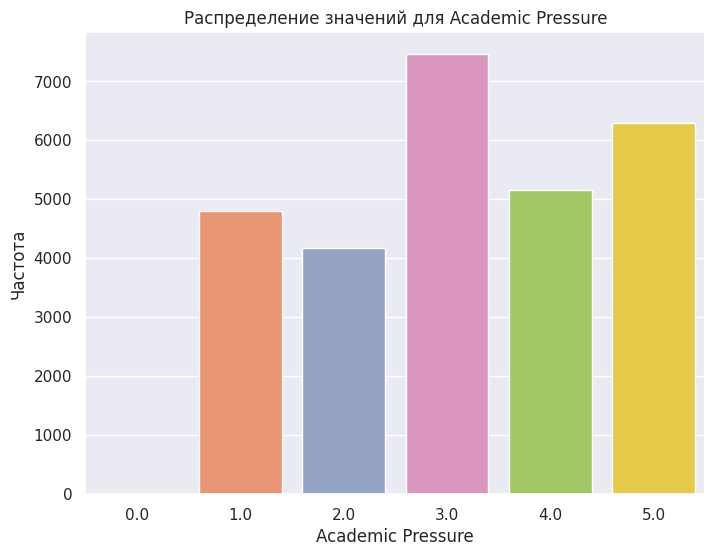

<ipython-input-75-fc1125aa9b07>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[col], palette='Set2')


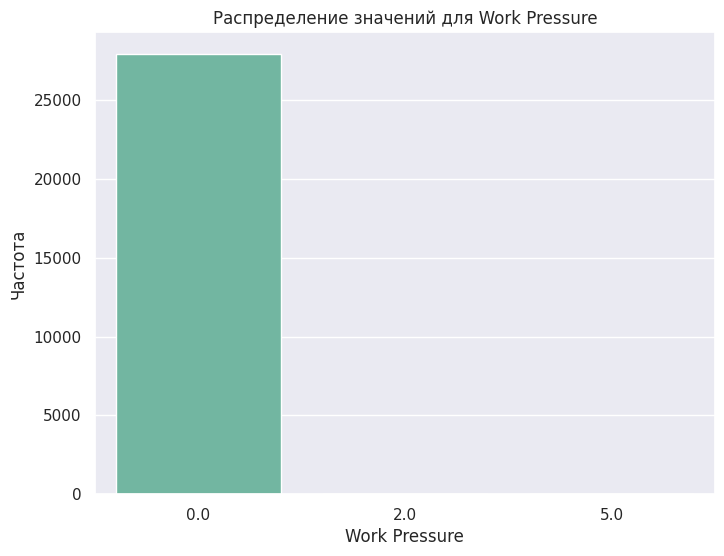

<ipython-input-75-fc1125aa9b07>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[col], palette='Set2')


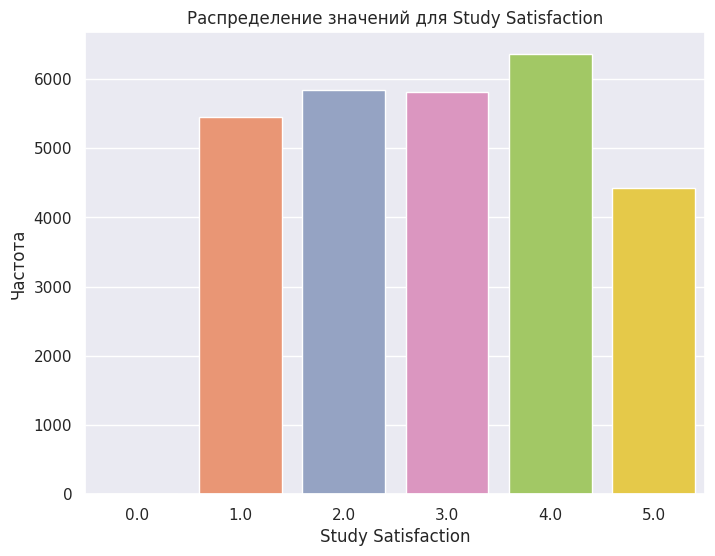

<ipython-input-75-fc1125aa9b07>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[col], palette='Set2')


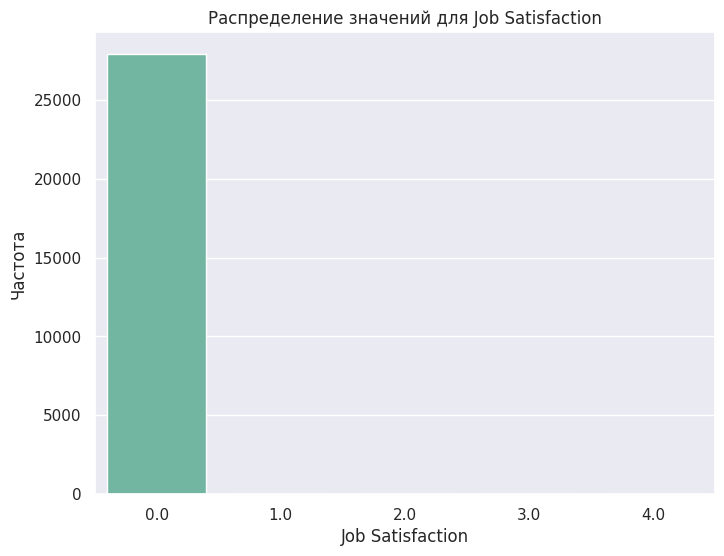

<ipython-input-75-fc1125aa9b07>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[col], palette='Set2')


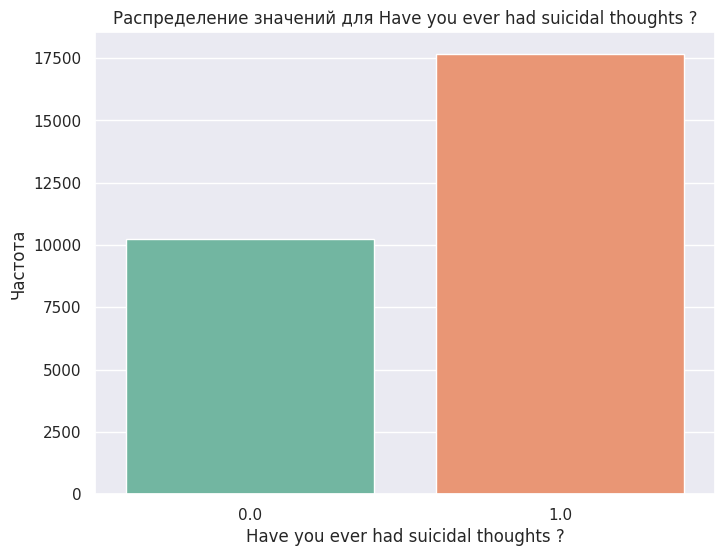

<ipython-input-75-fc1125aa9b07>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[col], palette='Set2')


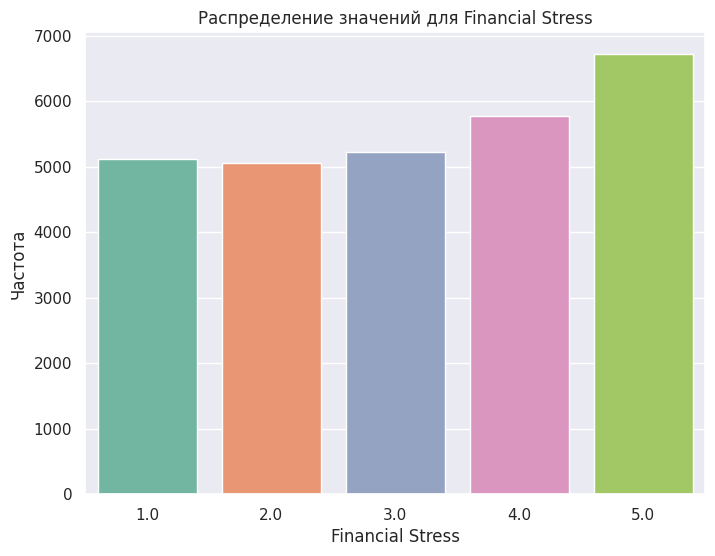

<ipython-input-75-fc1125aa9b07>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train[col], palette='Set2')


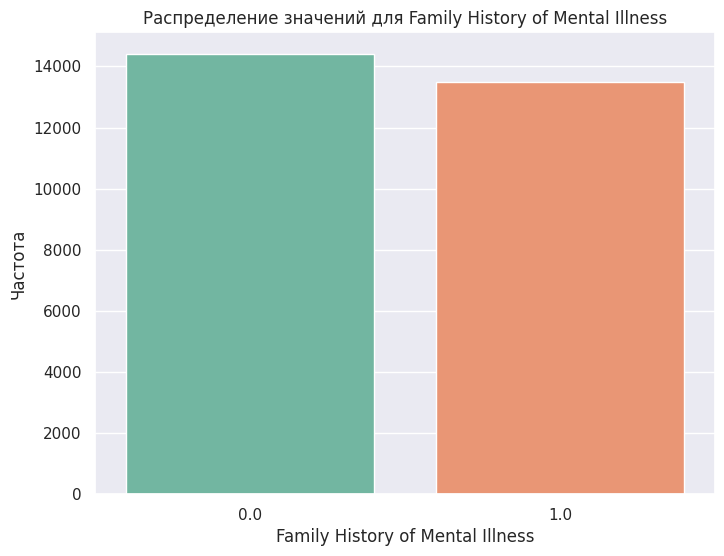

In [ ]:
# Список бинарных признаков
bin_columns = ['Gender', 'Academic Pressure', 'Work Pressure', 'Study Satisfaction', 'Job Satisfaction', 'Have you ever had suicidal thoughts ?', 'Financial Stress', 'Family History of Mental Illness']
for col in bin_columns:
    plt.figure(figsize=(8, 6))

    sns.countplot(x=train[col], palette='Set2')
    plt.title(f'Распределение значений для {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')

    plt.show()

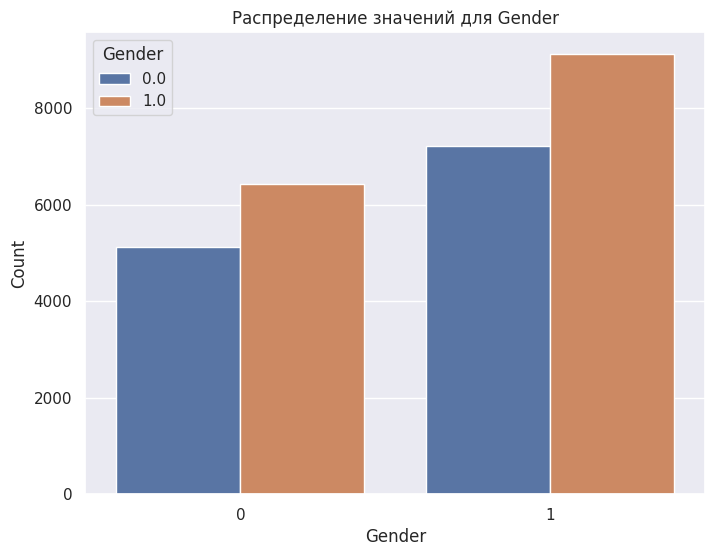

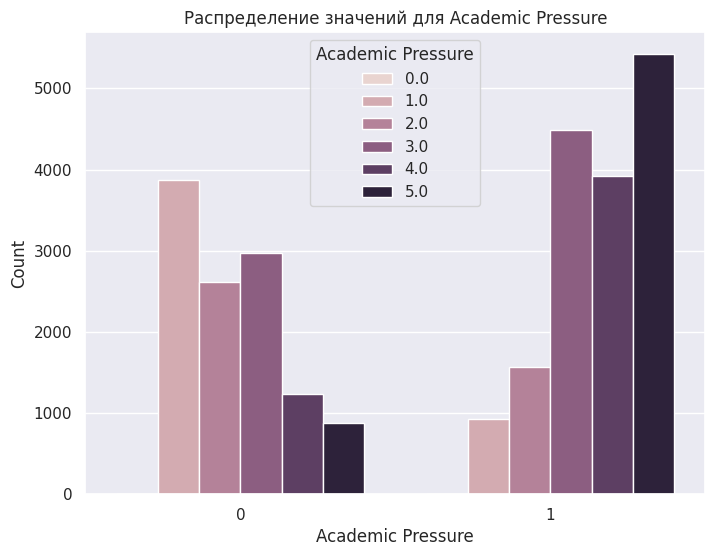

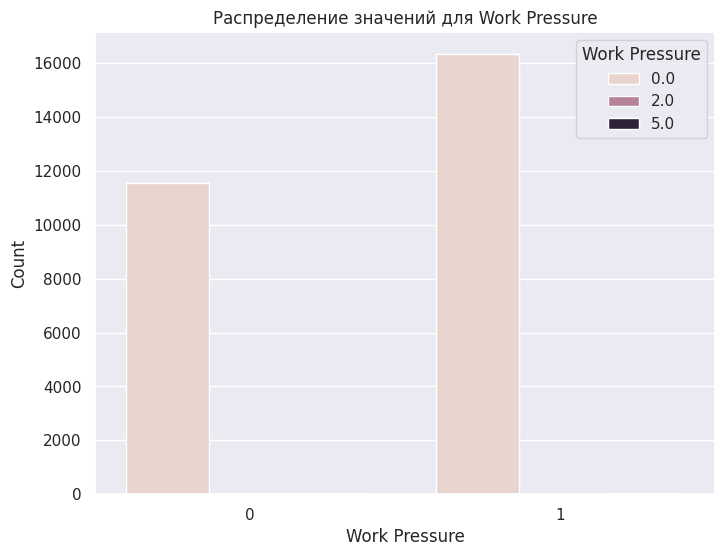

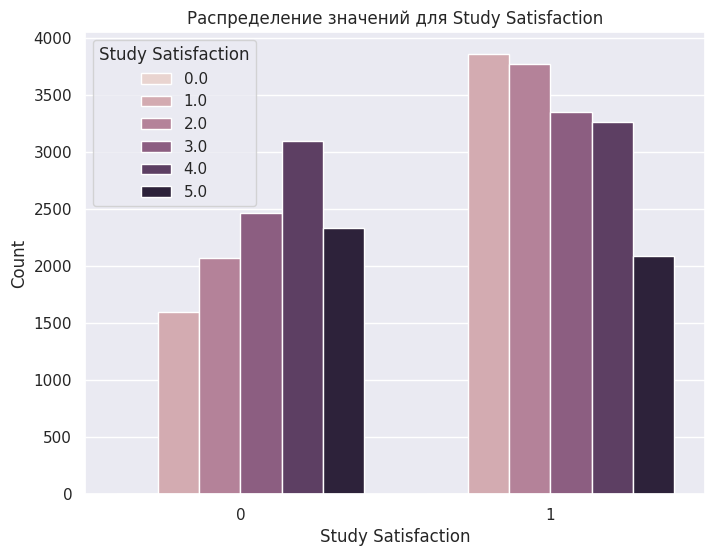

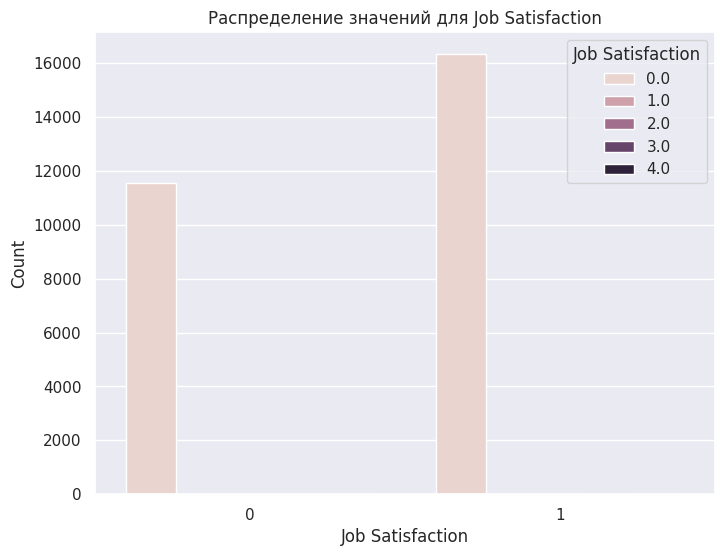

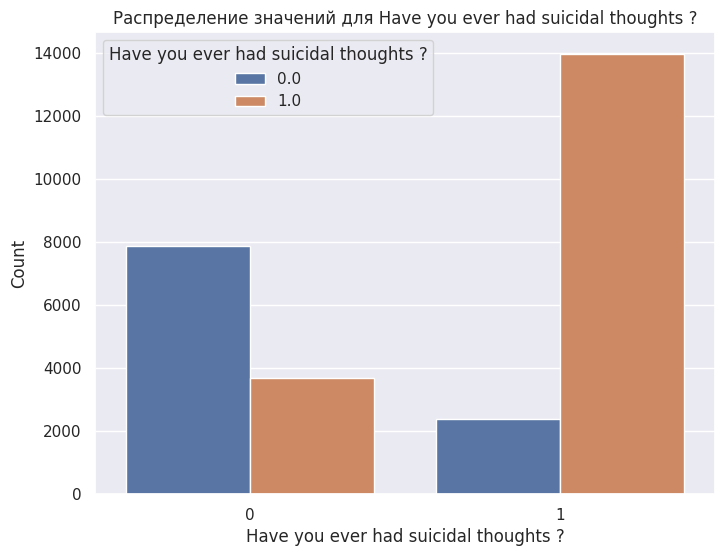

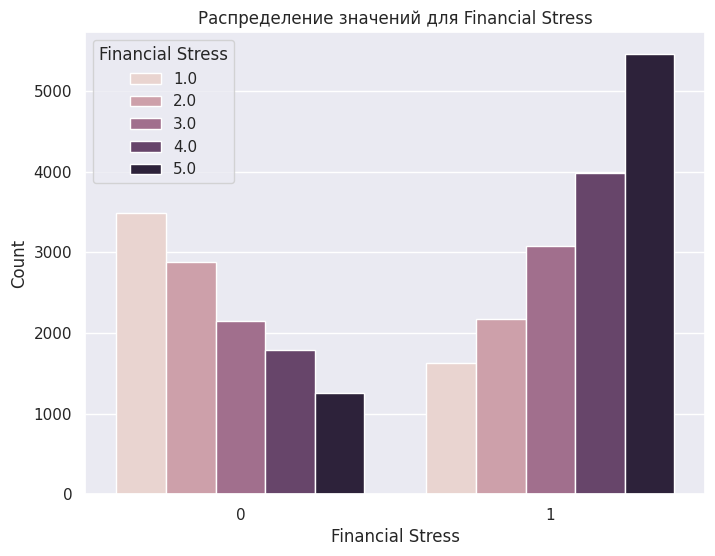

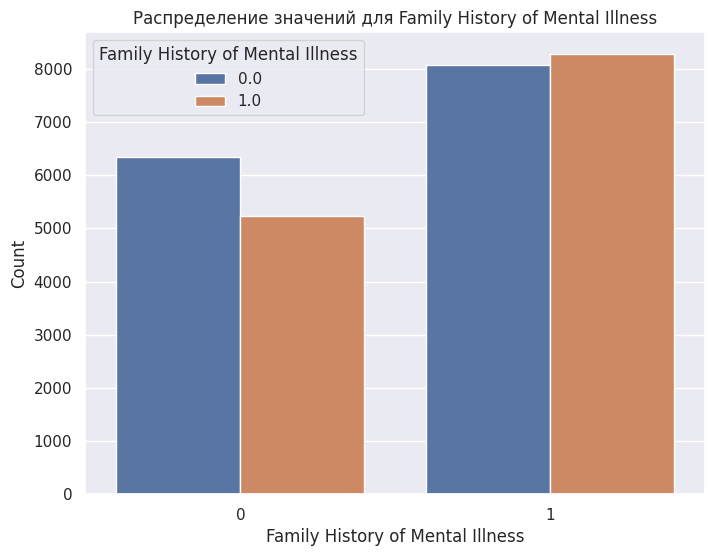

In [ ]:
for col in bin_columns:
    plt.figure(figsize=(8, 6))

    sns.countplot(data=train, x="Depression", hue=col);
    plt.title(f'Распределение значений для {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    plt.show()

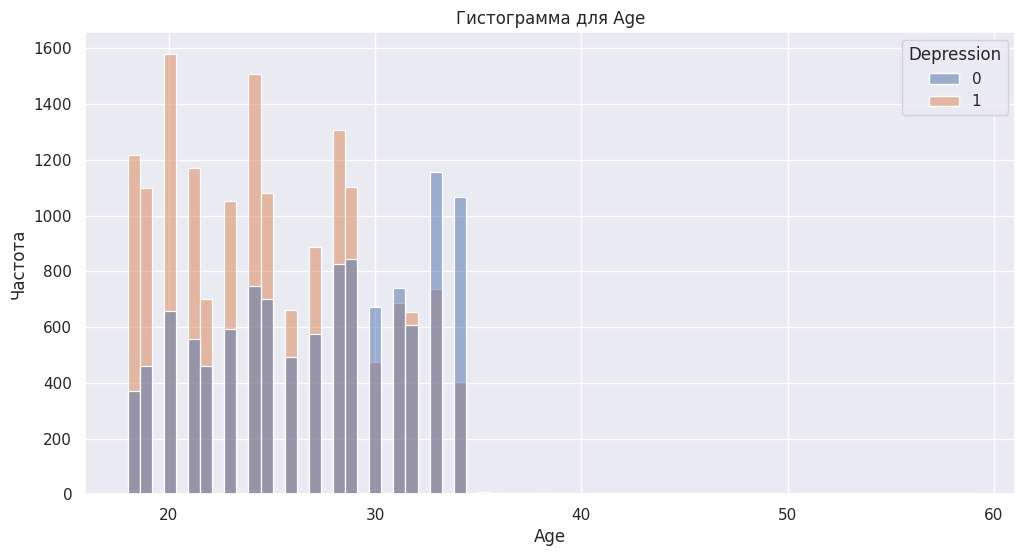

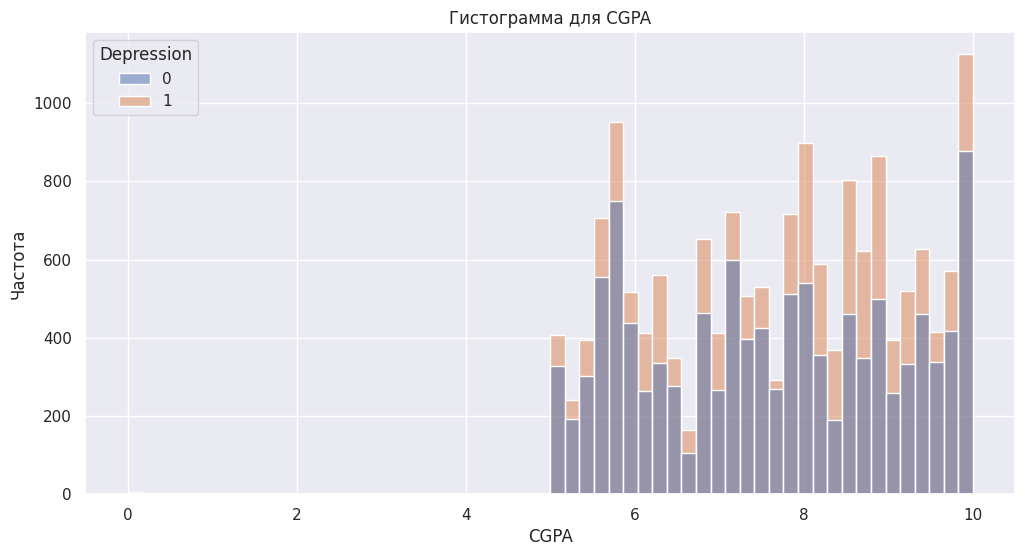

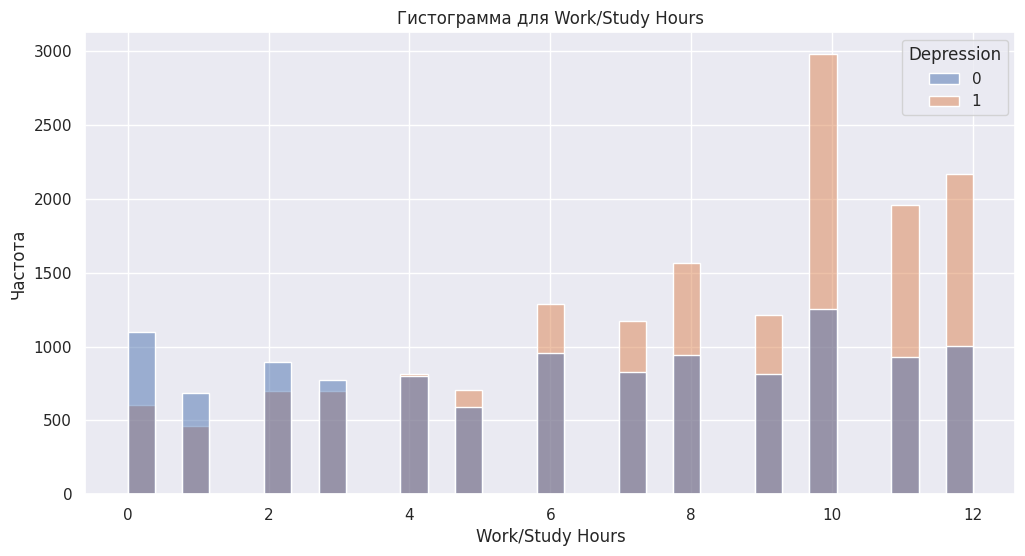

In [ ]:
numeric_columns = ['Age', 'CGPA', 'Work/Study Hours']

for col in numeric_columns:
    plt.figure(figsize=(12, 6))

    sns.histplot(data=train, x=col, hue="Depression")
    plt.title(f'Гистограмма для {col}')
    plt.xlabel(col)
    plt.ylabel('Частота')

    plt.show()

Построим групповые диаграммы

In [ ]:
train = train.drop('Profession', axis=1)
train.head()

id  Gender   Age  City  Academic Pressure  Work Pressure  CGPA  \
0   2     1.0  33.0  51.0                5.0            0.0  8.97   
1   8     0.0  24.0   3.0                2.0            0.0  5.90   
2  26     1.0  31.0  44.0                3.0            0.0  7.03   
3  30     0.0  28.0  49.0                3.0            0.0  5.59   
4  32     0.0  25.0  16.0                4.0            0.0  8.13   

   Study Satisfaction  Job Satisfaction  Sleep Duration  Dietary Habits  \
0                 2.0               0.0             0.0             0.0   
1                 5.0               0.0             0.0             1.0   
2                 5.0               0.0             2.0             0.0   
3                 2.0               0.0             1.0             1.0   
4                 3.0               0.0             0.0             1.0   

   Degree  Have you ever had suicidal thoughts ?  Work/Study Hours  \
0     3.0                                    1.0               3.0   
1    10.0                                    0.0               3.0   
2     5.0                                    0.0               9.0   
3     7.0                                    1.0               4.0   
4    17.0                                    1.0               1.0   

   Financial Stress  Family History of Mental Illness  Depression  
0               1.0                               0.0           1  
1               2.0                               1.0           0  
2               1.0                               1.0           0  
3               5.0                               1.0           1  
4               1.0                               0.0           0

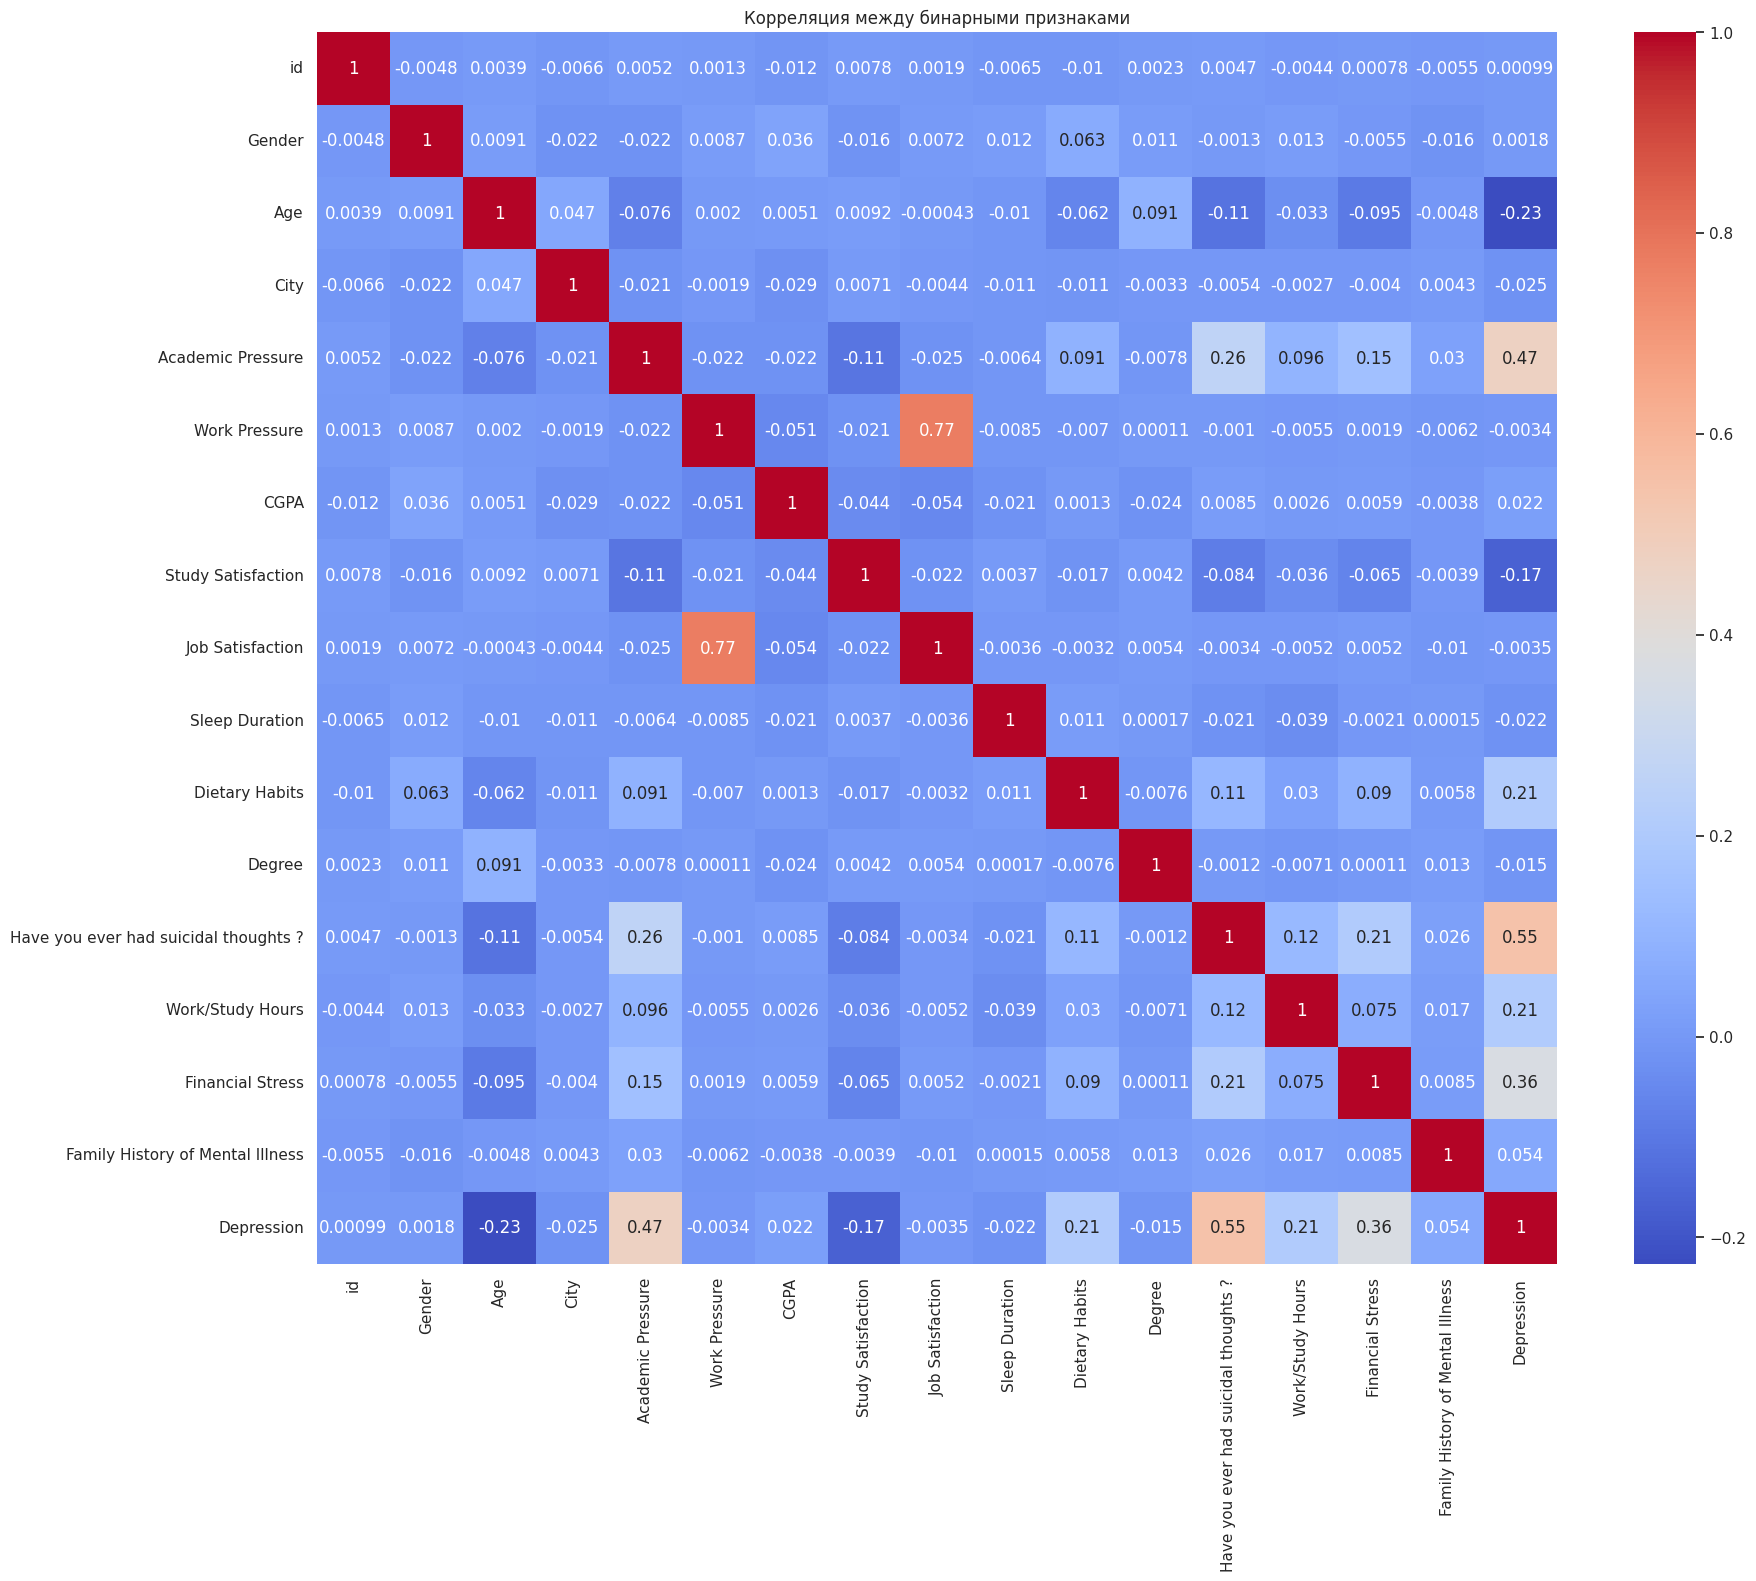

In [ ]:
plt.figure(figsize=(20, 16))
# Тепловая карта корреляций между признаками
sns.heatmap(train.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляция между бинарными признаками')
plt.show()

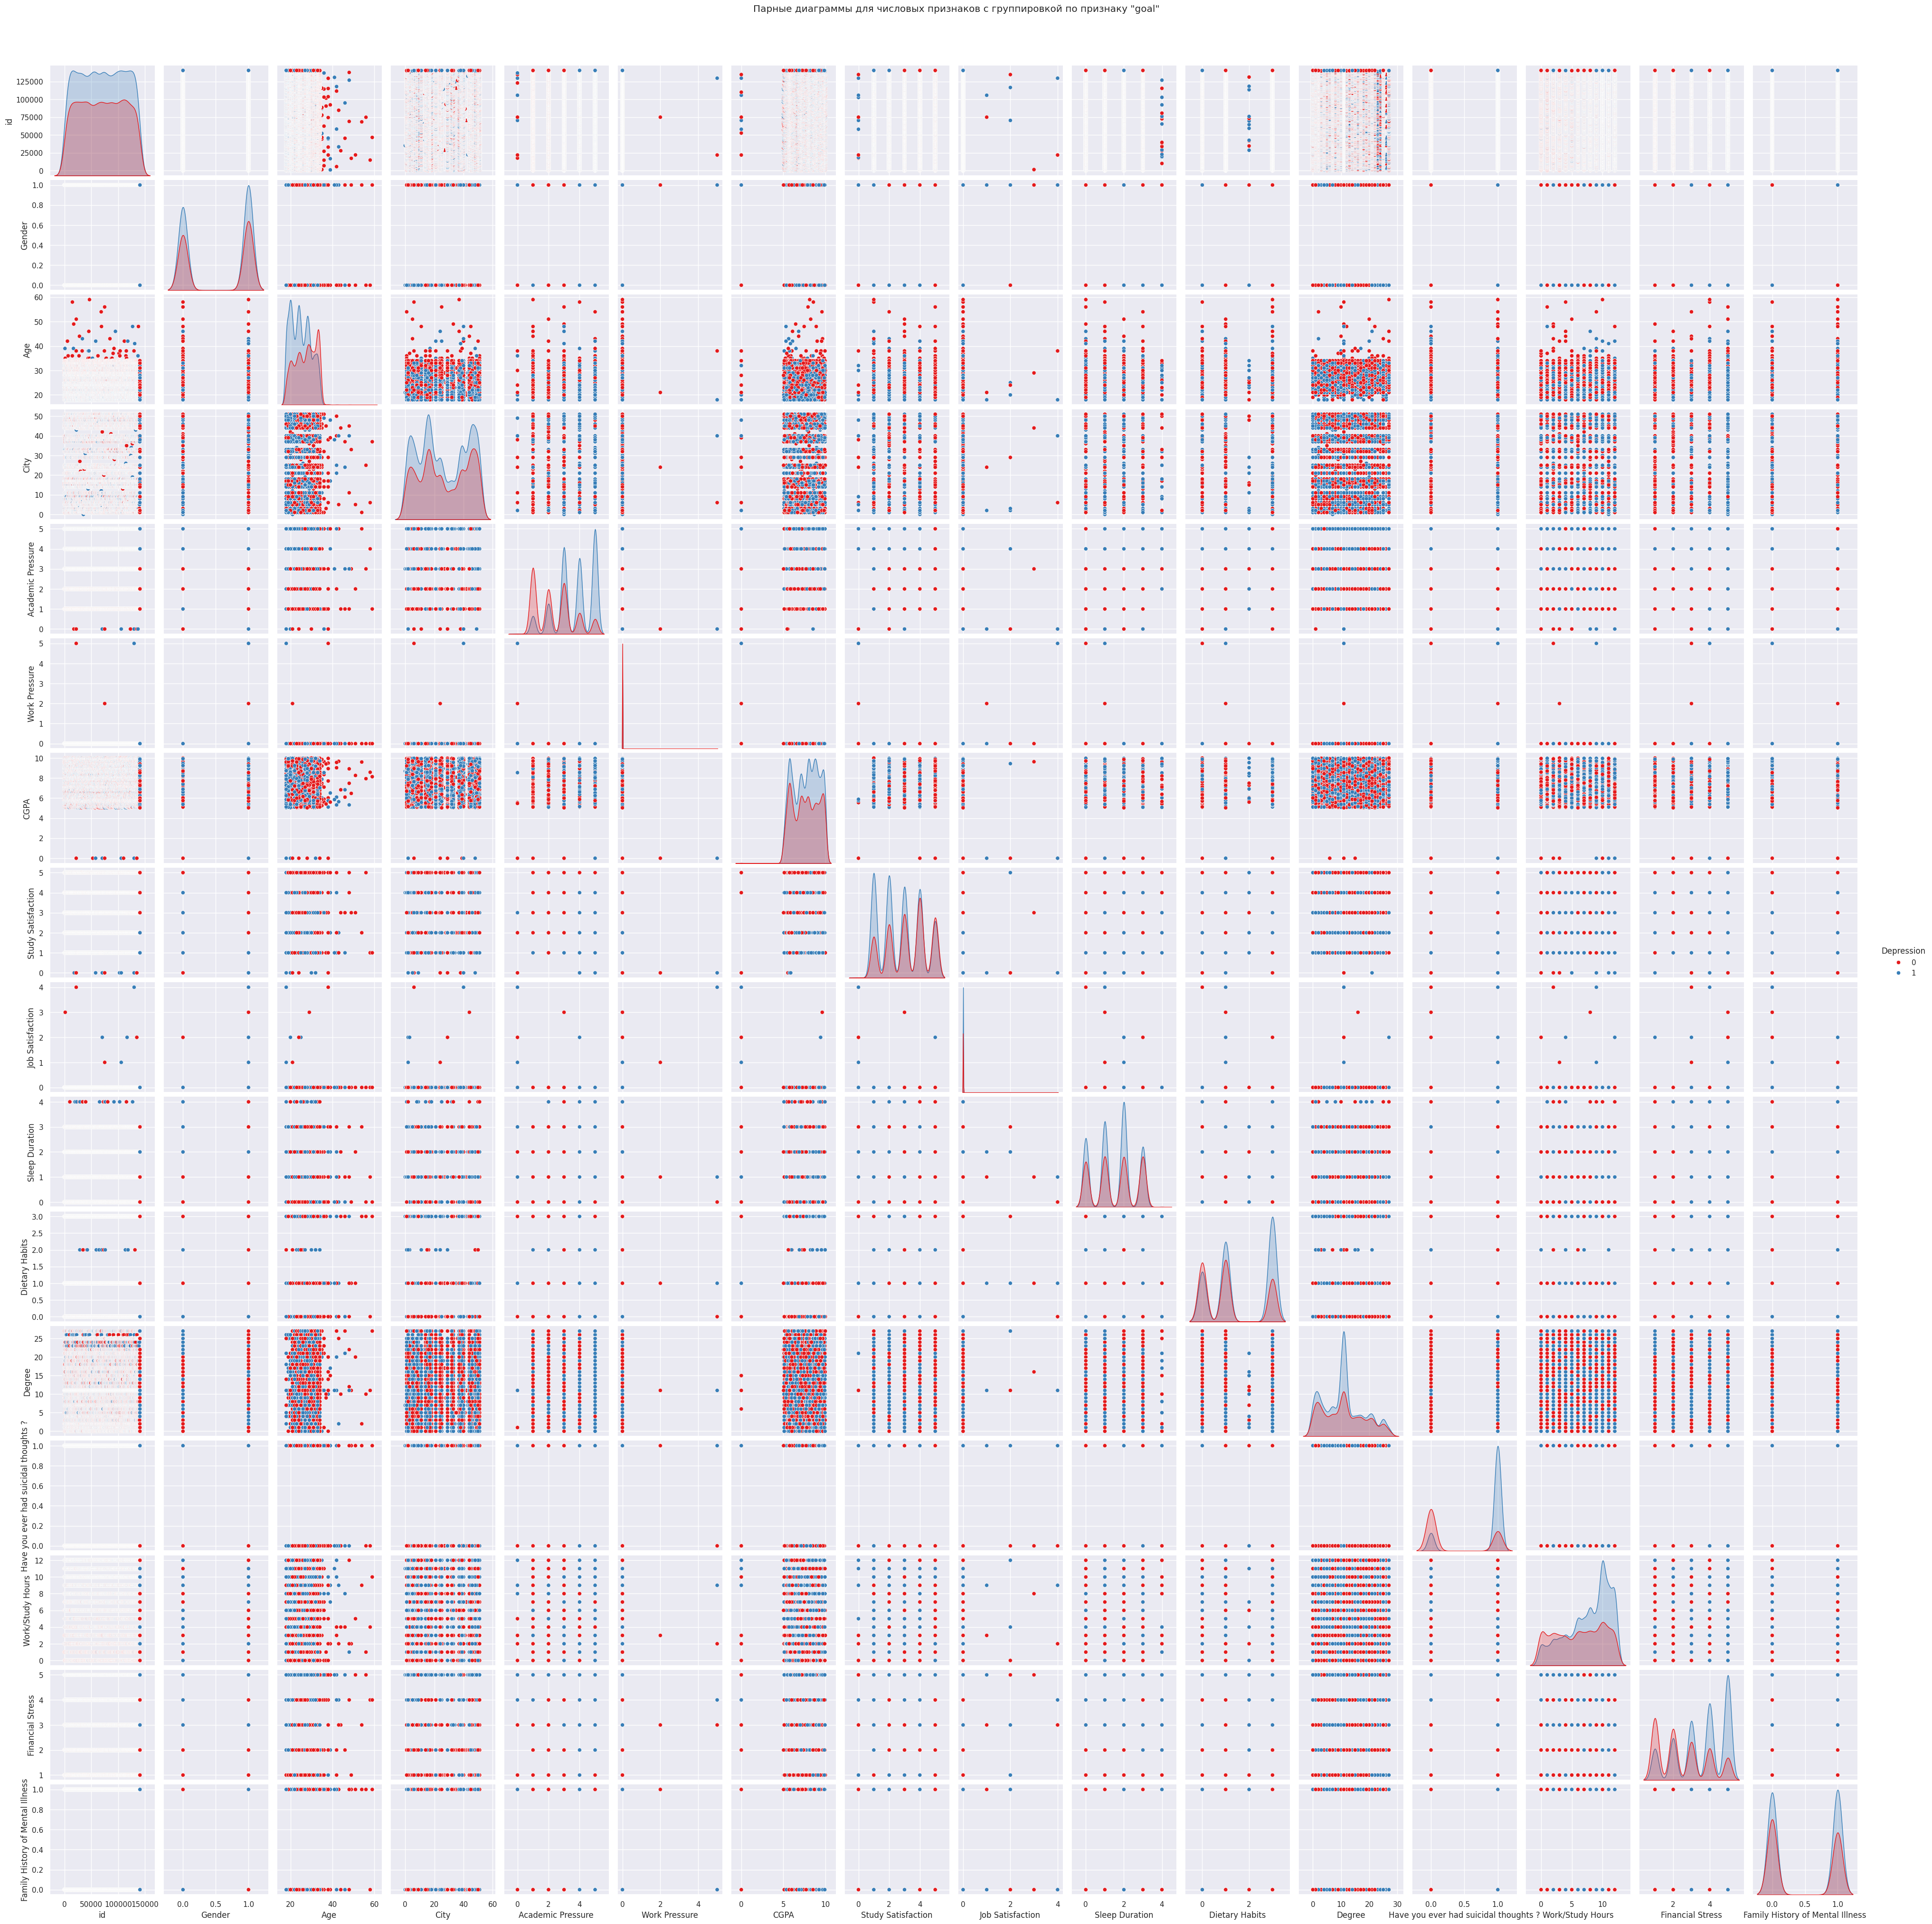

In [ ]:
sns.pairplot(train, hue='Depression', palette='Set1')
plt.suptitle('Парные диаграммы для числовых признаков с группировкой по признаку "Depression"', y=1.02)
plt.show()

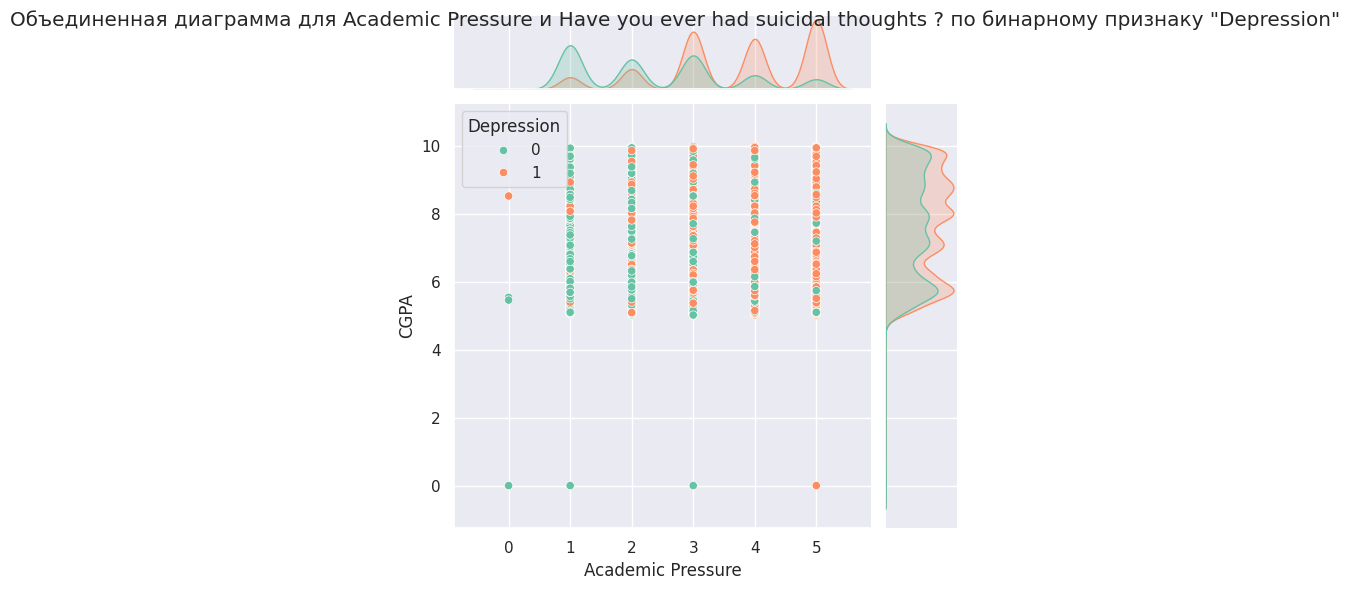

In [ ]:
sns.jointplot(x='Academic Pressure', y='CGPA', hue='Depression', data=train, palette='Set2')
plt.suptitle('Объединенная диаграмма для Academic Pressure и Have you ever had suicidal thoughts ? по бинарному признаку "Depression"')
plt.show()